## Take a look at the format of the val dataset

## import the val data

In [1]:
%matplotlib inline
import sys
sys.path.append('/home/xuxin/work/python/data/coco-master/PythonAPI')
from pycocotools.coco import COCO
from pycocoevalcap.eval import COCOEvalCap
import matplotlib.pyplot as plt
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

import json
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')

dataDir='.'
dataType='val2014'
annFile='%s/annotations/captions_%s.json'%(dataDir,dataType)

resFile = '../../data/val/test500_model35000.json'
# algName = 'fakecap'
# resFile= '%s/results/captions_%s_%s_%s.json' % (dataDir,dataType,algName,'results')

In [2]:
coco = COCO(annFile)
cocoRes = coco.loadRes(resFile)

loading annotations into memory...
0:00:01.046227
creating index...
index created!
Loading and preparing results...     
DONE (t=0.05s)
creating index...
index created!


In [3]:
cocoEval = COCOEvalCap(coco, cocoRes)
cocoEval.params['image_id'] = cocoRes.getImgIds()
cocoEval.evaluate()

tokenization...
setting up scorers...
computing Bleu score...
{'reflen': 4862, 'guess': [4907, 4407, 3907, 3407], 'testlen': 4907, 'correct': [3131, 1387, 534, 207]}
ratio: 1.00925545043
Bleu_1: 0.638
Bleu_2: 0.448
Bleu_3: 0.302
Bleu_4: 0.202
computing METEOR score...
METEOR: 0.202
computing Rouge score...
ROUGE_L: 0.461
computing CIDEr score...
CIDEr: 0.689


In [4]:
for metric, score in cocoEval.eval.items():
    print '%s: %.3f'%(metric, score)

CIDEr: 0.689
Bleu_4: 0.202
Bleu_3: 0.302
Bleu_2: 0.448
Bleu_1: 0.638
ROUGE_L: 0.461
METEOR: 0.202


ground truth captions
The skateboarder is putting on a show using the picnic table as his stage.
A skateboarder pulling tricks on top of a picnic table.
A man riding on a skateboard on top of a table.
A skate boarder doing a trick on a picnic table.
A person is riding a skateboard on a picnic table with a crowd watching.


generated caption (CIDEr score 1.0)
a man riding a skateboard on a ramp


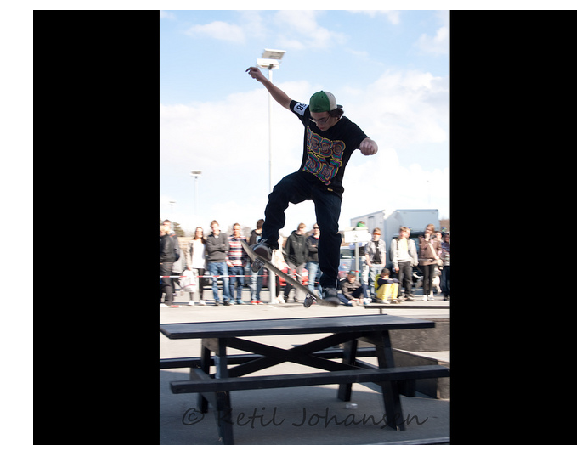

In [5]:
evals = [eva for eva in cocoEval.evalImgs if eva['CIDEr']<30]
print 'ground truth captions'
imgId = evals[0]['image_id']
annIds = coco.getAnnIds(imgIds=imgId)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

print '\n'
print 'generated caption (CIDEr score %0.1f)'%(evals[0]['CIDEr'])
annIds = cocoRes.getAnnIds(imgIds=imgId)
anns = cocoRes.loadAnns(annIds)
coco.showAnns(anns)


imageDir = '/home/xuxin/work/python/data/val2014'
img = coco.loadImgs(imgId)[0]
I = io.imread('%s/%s'%(imageDir, img['file_name']))
plt.imshow(I)
plt.axis('off')
plt.show()

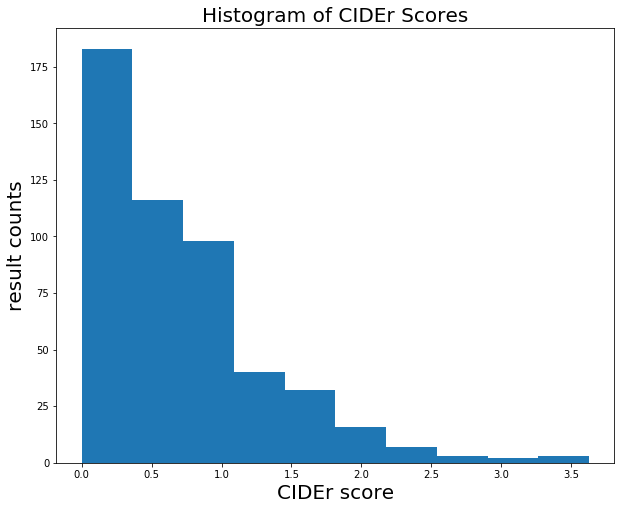

In [6]:
ciderScores = [eva['CIDEr'] for eva in cocoEval.evalImgs]
plt.hist(ciderScores)
plt.title('Histogram of CIDEr Scores', fontsize=20)
plt.xlabel('CIDEr score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()

In [21]:

save_result = False
if save_result:
    json.dump(cocoEval.evalImgs, open(evalImgsFile, 'w'))
    json.dump(cocoEval.eval,     open(evalFile, 'w'))

